### ALGORITMO GRADIENTE DESCENDENTE MÚLTIPLAS VARIÁVEIS - REGRESSÃO LINEAR 

In [1]:
#importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

DADOS

In [2]:
df = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')
y_df=df['Cateter']


PRÉ-PROCESSAMENTO (PADRONIZAÇÃO) - Standard score

In [3]:
df_norm = (df - df.mean()) / df.std()

PEGANDO NÚMERO DE FEATURES 

In [4]:
n_features = len(df_norm.columns)-1

Criando um vetor de W's baseado na quantidades de features

In [5]:
w = np.random.rand(1,n_features+1) ## Gerando valores aleatórios entre 0 e 1

TRANSFORMANDO O DATAFRAME EM NUMPY X,y

In [6]:
X = np.array(df_norm.drop('Cateter', axis=1))
y = df_norm.iloc[:, 2:3].values

CRIANDO X-zero com valores = 1

In [7]:
## criando uma função
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X) , axis=1)

DEFININDO CUSTO - MSE

In [8]:
def custo(w,X,y):
    m = len(X)
    
    erro = (X@w.T - y)
    
    custo = np.sum(np.power(erro,2))
    
    return custo/m

GRADIENT DESCENT

In [50]:
def gradient_descent(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)
    
    for i in range(epoch):
        
        w = w - (alpha/len(X)) * np.sum((X@w.T - y)*X, axis=0)
        
        cost[i] = custo(w, X, y)
    
    return w, cost

INICIALIZANDO (adiciona x0 com valores = 1)

In [51]:
X = insert_ones(X)

TAXA DE APRENDIZADO E NÚMERO DE ITERAÇÕES

In [52]:
alpha = 0.01
epoch = 800

RODANDO TUDO

In [53]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

Custo final

In [54]:
custo(w, X, y)

0.17020726580362558

MOSTRANDO O CUSTO

Text(0.5, 1.0, 'Erro vs. Epoch')

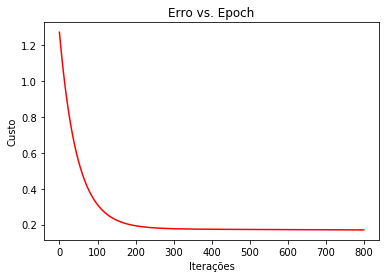

In [55]:
#plotando o custo
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')

MOSTRANDO OS PESOS

In [56]:
w

array([[3.21939258e-04, 2.32263637e-01, 6.84213725e-01]])

PREDIÇÃO - DESAFIO PARA REALIZAR UMA REGRESSÃO USANDO MÚLTIPLAS VARIÁVEIS:
- Receber novos valores para [[size, bedroom]]
- Pré-processar usando a média e desvio padrão do conjunto original
- Realizar a regressão no modelo X@w.T
- Despadronizar o valor da predição obtendo o valor final da regressão

DEFININDO O MODELO DE PREDIÇÃO (HIPÓTESE) 

In [66]:
df_test = pd.read_csv('new_data.csv')

In [67]:
df_test

,Peso,Altura
0,7.71,0.978
1,17.46,1.092
2,40.00,1.500
3,3.50,0.550
4,20.00,1.400


In [68]:
x_df = df[['Peso','Altura']]
df_test_norm = (df_test - x_df.mean()) / x_df.std()

In [69]:
df_test_norm

,Peso,Altura
0,-0.810679,-0.155373
1,0.014364,0.220659
2,1.921694,1.566460
3,-1.166928,-1.567144
4,0.229298,1.236607


In [70]:
X_new = np.array(df_test_norm)
X_new = insert_ones(X_new)
X_new

array([[ 1.        , -0.8106786 , -0.15537303],
       [ 1.        ,  0.01436426,  0.2206594 ],
       [ 1.        ,  1.92169409,  1.56645966],
       [ 1.        , -1.16692787, -1.56714389],
       [ 1.        ,  0.2292985 ,  1.23660666]])

In [71]:
y_pred = X_new@w.T
y_pred

array([[-0.29427758],
       [ 0.15463642],
       [ 1.5184548 ],
       [-1.34297433],
       [ 0.89968289]])

In [63]:
Y_df = df['Cateter']

In [72]:
y_ok = y_pred*Y_df.std()+Y_df.mean()

In [73]:
y_ok

array([[33.76008077],
       [37.43127487],
       [48.58450683],
       [25.18389617],
       [43.52422405]])